In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Q1

## 2015 female mean years df

In [2]:
df_sch = pd.read_csv('dataset/ddf--gapminder--systema_globalis-master/ddf--datapoints--mean_years_in_school_women_25_to_34_years--by--geo--time.csv')
df_sch = df_sch[df_sch['time'] == 2015]
print(df_sch.shape)
df_sch.head()

(188, 3)


,geo,time,mean_years_in_school_women_25_to_34_years
45,afg,2015,0.98
91,ago,2015,5.31
137,alb,2015,12.26
183,and,2015,15.13
229,are,2015,13.18


## 2015 female population

In [3]:
# female 20-39 ratio
df_ratio = pd.read_csv('dataset/ddf--gapminder--systema_globalis-master/ddf--datapoints--population_aged_20_39_years_female_percent--by--geo--time.csv')
df_ratio = df_ratio[df_ratio['time'] == 2015]
print(df_ratio.shape)
df_ratio.head()

(200, 3)


,geo,time,population_aged_20_39_years_female_percent
13,abw,2015,23.45731
44,afg,2015,27.67341
75,ago,2015,27.12524
106,alb,2015,27.34373
137,are,2015,45.18014


In [4]:
# total cnt
df_total_cnt = pd.read_csv('dataset/ddf--gapminder--systema_globalis-master/ddf--datapoints--population_total--by--geo--time.csv')
df_total_cnt = df_total_cnt[df_total_cnt['time'] == 2015]
print(df_total_cnt.shape)
df_total_cnt.head()

(197, 3)


,geo,time,population_total
215,afg,2015,33736494
516,ago,2015,27859305
817,alb,2015,2923352
1118,and,2015,78014
1419,are,2015,9154302


In [5]:
# male 20-39 ratio
df_male_ratio = pd.read_csv('dataset/ddf--gapminder--systema_globalis-master/ddf--datapoints--population_aged_20_39_years_male_percent--by--geo--time.csv')
df_male_ratio = df_male_ratio[df_male_ratio['time'] == 2015]
print(df_male_ratio.shape)
df_male_ratio.head()

(200, 3)


,geo,time,population_aged_20_39_years_male_percent
13,abw,2015,24.47124
44,afg,2015,28.45191
75,ago,2015,26.83793
106,alb,2015,29.34722
137,are,2015,55.87304


In [6]:
# 20-39 ratio
df_both_ratio = pd.read_csv('dataset/ddf--gapminder--systema_globalis-master/ddf--datapoints--population_aged_20_39_years_both_sexes_percent--by--geo--time.csv')
df_both_ratio = df_both_ratio[df_both_ratio['time'] == 2015]
print(df_both_ratio.shape)
df_both_ratio.head()

(200, 3)


,geo,time,population_aged_20_39_years_both_sexes_percent
13,abw,2015,23.93882
44,afg,2015,28.07470
75,ago,2015,26.98442
106,alb,2015,28.35529
137,are,2015,53.00008


In [7]:
# female vs male ratio
df_fm_ratio = df_male_ratio.merge(df_ratio).merge(df_both_ratio)
df_fm_ratio['fm_ratio'] = \
    ((df_fm_ratio.population_aged_20_39_years_both_sexes_percent -  df_fm_ratio.population_aged_20_39_years_male_percent) /
     (df_fm_ratio.population_aged_20_39_years_female_percent - df_fm_ratio.population_aged_20_39_years_male_percent))
df_fm_ratio.head()

,geo,time,population_aged_20_39_years_male_percent,population_aged_20_39_years_female_percent,population_aged_20_39_years_both_sexes_percent,fm_ratio
0,abw,2015,24.47124,23.45731,23.93882,0.525105
1,afg,2015,28.45191,27.67341,28.07470,0.484534
2,ago,2015,26.83793,27.12524,26.98442,0.509867
3,alb,2015,29.34722,27.34373,28.35529,0.495101
4,are,2015,55.87304,45.18014,53.00008,0.268679


# female count

In [8]:
# female count
df_cnt = df_total_cnt.merge(df_fm_ratio[['geo', 'time', 'fm_ratio']], on=['geo', 'time'], how='inner')
df_cnt['female_total'] = (df_cnt['population_total'] * df_cnt['fm_ratio']).astype(int)
df_cnt.head()

,geo,time,population_total,fm_ratio,female_total
0,afg,2015,33736494,0.484534,16346490
1,ago,2015,27859305,0.509867,14204551
2,alb,2015,2923352,0.495101,1447354
3,are,2015,9154302,0.268679,2459570
4,arg,2015,43417765,0.510679,22172542


# female edu avg

In [9]:
df_avg = df_sch.merge(df_cnt[['geo', 'time', 'female_total']], on=['geo', 'time'])
df_avg.head()

,geo,time,mean_years_in_school_women_25_to_34_years,female_total
0,afg,2015,0.98,16346490
1,ago,2015,5.31,14204551
2,alb,2015,12.26,1447354
3,are,2015,13.18,2459570
4,arg,2015,13.00,22172542


In [10]:
sum(df_avg.mean_years_in_school_women_25_to_34_years * df_avg.female_total) / sum(df_avg.female_total)

9.176794468159336

# by income

In [11]:
df_income = pd.read_csv('dataset/ddf--gapminder--systema_globalis-master/ddf--entities--geo--country.csv')
df_income = df_income[['country', 'income_groups']]
df_income = df_income[~df_income['income_groups'].isna()]
print(df_income.shape)
df_income.head()

(214, 2)


,country,income_groups
1,abw,high_income
2,afg,low_income
3,ago,upper_middle_income
7,alb,upper_middle_income
8,and,high_income


In [12]:
df_grouped = df_avg.merge(df_income, left_on='geo', right_on='country')
df_grouped.head()

,geo,time,mean_years_in_school_women_25_to_34_years,female_total,country,income_groups
0,afg,2015,0.98,16346490,afg,low_income
1,ago,2015,5.31,14204551,ago,upper_middle_income
2,alb,2015,12.26,1447354,alb,upper_middle_income
3,are,2015,13.18,2459570,are,high_income
4,arg,2015,13.00,22172542,arg,upper_middle_income


In [13]:
df_income_index = pd.read_csv('dataset/ddf--gapminder--systema_globalis-master/ddf--entities--geo--income_groups.csv')
df_income_index = df_income_index[['income_groups', 'rank']]

In [14]:
df_grouped['total_years'] = df_grouped.mean_years_in_school_women_25_to_34_years * df_grouped.female_total
df_grouped_sum = df_grouped.groupby('income_groups').sum()
df_grouped_sum['avg_years'] = df_grouped_sum['total_years'] / df_grouped_sum.female_total
df_grouped_sum = df_grouped_sum.reset_index()
df_grouped_sum =  df_grouped_sum.merge(df_income_index).sort_values(by=['rank'])
df_grouped_sum

,income_groups,time,mean_years_in_school_women_25_to_34_years,female_total,total_years,avg_years,rank
0,high_income,102765,695.95,648661597,9.436578e+09,14.547768,1
3,upper_middle_income,100750,557.33,1228797175,1.240386e+10,10.094310,2
2,lower_middle_income,94705,400.36,1300333249,9.115873e+09,7.010413,3
1,low_income,72540,179.51,460869758,2.434941e+09,5.283359,4


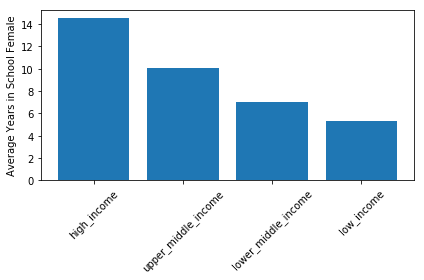

In [15]:
plt.bar(df_grouped_sum['income_groups'], df_grouped_sum['avg_years'])
plt.xticks(rotation=45)
plt.ylabel('Average Years in School Female')
plt.tight_layout()
plt.savefig('output/income_female_school')